<a href="https://colab.research.google.com/github/mababil/Heart-Disease/blob/main/SC61207_MuhammadAbabil_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question


Berdasarkan dataset yang telah kalian pilih pada Assignment 2:
1. Peserta mampu melakukan determinasi machine learning model mana yang relevan sesuai dengan dataset yang telah dipilih dengan problem understanding yang telah dilakukan sebelumnya.
2. Peserta mampu menyajikan alasan penggunaan machine learning model pada poin 1.
3. Peserta dapat melakukan eksekusi coding machine learning model yang telah ditentukan pada poin 1 dengan tepat sesuai urutan yang tepat.
4. Peserta mampu menerapkan cross-validation basic dari machine learning model yang telah dibuat sebelumnya.
5. Peserta dapat menjelaskan hasil dari cross-validation basic yang telah dihasilkan sebelumnya pada poin 4.
6. Peserta mampu menerapkan learning curves dari machine learning model yang telah dibuat sebelumnya serta membuat visualisasi hasil dari learning curves yang dihasilkan.
7. Peserta dapat menjelaskan hasil dari visualisasi learning curves yang telah dihasilkan sebelumnya pada poin 6.
8. Peserta mampu memperbaiki akurasi machine learning modul yang telah dibuat menggunakan hyperparameter tuning dan juga bootstrapping, jika ada.
9. Peserta dapat mengukur model yang dibuat dengan metric evaluation yang sesuai dengan machine learning model yang telah dibuat sebelumnya dan yang terbaik untuk menyelesaikan masalah.
10. Peserta dapat memberikan interpretasi dari hasil metric evaluation serta alasan pemilihan metric yang dipilih pada poin 9.

In [218]:
#@title Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import learning_curve, cross_val_score

In [219]:
#@title Load Data
df = pd.read_csv('https://raw.githubusercontent.com/mababil/Heart-Disease/main/heart.csv')

## Understanding Data

In [220]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [221]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [222]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [224]:
df.shape

(1025, 14)

## Melihat missing value dan mengatasinya

In [225]:
missing_values = df.isnull().sum()
print("Jumlah nilai yang hilang dalam setiap kolom:")
print(missing_values)

Jumlah nilai yang hilang dalam setiap kolom:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [226]:
#melihat data duplikat ada atau tidak
df_dup = df.duplicated().any()
print(df_dup)

True


In [227]:
#jumlah data yang duplikat
df.duplicated().sum()

723

In [228]:
#menghapus data yang duplicate
df = df.drop_duplicates()
df.duplicated().sum()

0

## Data Processing

In [229]:
#@title
cate_val=[]
cont_val=[]

for column in df.columns:
  if df[column].nunique() <=10:
    cate_val.append(column)
  else:
      cont_val.append(column)

In [230]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [231]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

## Encoding Categorical Data

In [232]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [233]:
df['cp'].unique()

array([0, 1, 2, 3])

In [234]:
cate_val.remove('sex')
cate_val.remove('target')
df = pd.get_dummies(df,columns=cate_val,drop_first=True)

In [235]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


##Feature Scaling

In [236]:
df. head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [237]:
st = StandardScaler()
df[cont_val] = st.fit_transform(df[cont_val])

In [238]:
df. head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


## Splitting the dataset into the training set and test set

In [239]:
X = df.drop('target', axis=1)
y = df['target']

In [240]:
from sklearn.model_selection import train_test_split

In [241]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=42)

In [242]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

# 1. Modeling
Pada tahap modeling disini saya mencoba untuk menerapkan beberapa metode seperti tampak dibawah ini, lalu nantinya saya akan memilih mana yang terbaik diantaranya

### Linear Regresion
Linear regression adalah metode statistik yang digunakan untuk memodelkan hubungan linier antara satu atau lebih variabel independen (fitur) dan variabel dependen (target). Tujuannya adalah untuk membuat garis lurus terbaik (garis regresi) yang mencocokkan data sebaik mungkin.


In [243]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [244]:
# Menampilkan koefisien
print("Koefisien Model:")
log.coef_

Koefisien Model:


array([[ 0.01370849, -1.07032681, -0.44925901, -0.08232571,  0.39579813,
        -0.67412903,  0.69598011,  1.60170614,  1.3953981 ,  0.01807923,
         0.89578685,  0.02149897, -0.33327193, -0.21384264,  0.33708325,
        -1.34038854, -1.08056744, -1.06464316,  0.20026757, -0.19218297,
         0.99806152, -0.49211591]])

In [245]:
y_pred1 = log.predict (X_test)
accuracy_score(y_test, y_pred1)

0.7868852459016393

### Support Vector Machine (SVM)
SVM adalah algoritma pembelajaran mesin yang digunakan untuk tugas klasifikasi dan regresi. Tujuannya adalah untuk menemukan hyperplane terbaik yang membagi ruang fitur ke dalam dua kelas sedemikian rupa sehingga margin antara kedua kelas adalah maksimum.

In [246]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train,y_train)

SVC()

In [247]:
y_pred2 = svm.predict (X_test)
accuracy_score(y_test,y_pred2)

0.8032786885245902

### K-Nearest Neighbors (KNN) Classifier
KNN adalah algoritma pembelajaran mesin yang sederhana dan non-parametrik yang digunakan untuk klasifikasi dan regresi. Ide dasarnya adalah untuk memprediksi kelas dari sebuah sampel dengan mengambil mayoritas kelas dari K tetangga terdekatnya (dengan jarak Euclidean atau metrik lainnya).

In [248]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [249]:
y_pred3 = knn.predict (X_test)
accuracy_score(y_test,y_pred3)

0.7377049180327869

### Decision Tree
 Decision tree adalah model pembelajaran mesin yang menggunakan struktur pohon untuk mengambil keputusan berbasis aturan. Setiap node dalam pohon mewakili fitur, cabang dari node mewakili keputusan berdasarkan fitur tersebut, dan daun mewakili hasil akhir (label atau nilai). Decision tree dapat digunakan untuk klasifikasi dan regresi.

In [250]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [251]:
# Menampilkan koefisien
print("Koefisien Model:")
log.coef_

Koefisien Model:


array([[ 0.01370849, -1.07032681, -0.44925901, -0.08232571,  0.39579813,
        -0.67412903,  0.69598011,  1.60170614,  1.3953981 ,  0.01807923,
         0.89578685,  0.02149897, -0.33327193, -0.21384264,  0.33708325,
        -1.34038854, -1.08056744, -1.06464316,  0.20026757, -0.19218297,
         0.99806152, -0.49211591]])

In [252]:
y_pred4= dt.predict(X_test)
accuracy_score(y_test,y_pred4)

0.7213114754098361

### Random Forest
 Random forest adalah model ensemble yang terdiri dari banyak pohon keputusan (decision trees). Setiap pohon dihasilkan secara acak dan bekerja secara independen. Prediksi akhir diambil dengan menggabungkan hasil prediksi dari semua pohon dalam ensemble.

In [253]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [254]:
y_pred5 = rf.predict (X_test)
accuracy_score(y_test,y_pred5)

0.7868852459016393

### Gradient Boosting Classifier
 Gradient Boosting Classifier adalah model ensemble yang juga terdiri dari banyak pohon keputusan. Namun, dalam gradient boosting, pohon-pohonnya dibangun secara berurutan dan setiap pohon berusaha memperbaiki kesalahan prediksi dari pohon sebelumnya. Ini dilakukan dengan mengoptimalkan fungsi kerugian menggunakan gradien turunan. Model ini sering menghasilkan prediksi yang sangat akurat, tetapi juga memerlukan waktu komputasi yang lebih lama.

In [255]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [256]:
y_pred6 = gbc.predict (X_test)
accuracy_score(y_test,y_pred6)

0.7540983606557377

### Final Data
Pada tahap ini kita akan menggabungkan accuracy score dari model yang sudah dilakukan sebelumnya dan menyimpannya di final_data. dan sekaligus menampilkan visualisasinya

In [257]:
final_data = pd.DataFrame({'Models':['LR', 'SVM', 'KNN', 'DT', 'RF', 'GB'],
                    'ACC': [accuracy_score(y_test, y_pred1),
                            accuracy_score(y_test, y_pred2),
                            accuracy_score(y_test, y_pred3),
                            accuracy_score(y_test, y_pred4),
                            accuracy_score(y_test, y_pred5),
                            accuracy_score(y_test, y_pred6),
                            ]})

In [258]:
final_data

,Models,ACC
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.737705
3,DT,0.721311
4,RF,0.786885
5,GB,0.754098


<ipython-input-259-fe56c67b2c69>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=final_data['Models'], y=final_data['ACC'], palette='Set1')


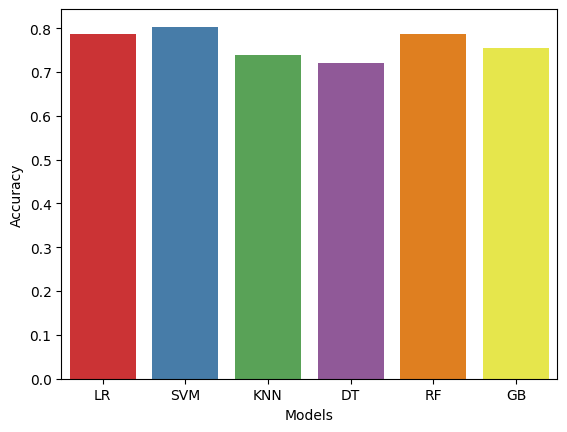

In [259]:
import seaborn as sns
sns.barplot(x=final_data['Models'], y=final_data['ACC'], palette='Set1')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

### 2. Peserta mampu menyajikan alasan penggunaan machine learning model pada poin 1.

Berdasarkan beberapa model yang ada diatas, (Support Vector Machines) SVM memiliki nilai tertinggi untuk prediksi dari dataset yang ada. SVM memberikan hasil prediksi yang lebih baik dalam kasus prediksi penyakit jantung karena kemampuannya yang efisien dalam memisahkan data yang kompleks, menangani dimensi tinggi, dan resisten terhadap overfitting. SVM juga kurang rentan terhadap outlier dan dapat bekerja dengan baik bahkan dengan jumlah sampel yang terbatas. Dengan berbagai jenis kernel yang tersedia, SVM dapat menyesuaikan pola-pola yang berbeda dalam data dengan baik. Oleh karena itu, SVM menjadi pilihan yang kuat untuk kasus prediksi penyakit jantung, menghasilkan hasil prediksi yang akurat dan dapat diandalkan.

### 4. Peserta mampu menerapkan cross-validation basic dari machine learning model yang telah dibuat sebelumnya.


In [260]:
# Standarisasi fitur-fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [261]:
# Melakukan cross-validation dan menghitung akurasi
cv_scores = cross_val_score(log, X_scaled, y, cv=5, scoring='accuracy')

In [262]:
# Melihat nilai akurasi untuk masing-masing fold
print("Cross-validation accuracy scores:", cv_scores)

Cross-validation accuracy scores: [0.85245902 0.83606557 0.91666667 0.78333333 0.8       ]


In [263]:
# Rata-rata dan standar deviasi akurasi
print("Mean accuracy:", np.mean(cv_scores))
print("Standard deviation of accuracy:", np.std(cv_scores))

Mean accuracy: 0.8377049180327868
Standard deviation of accuracy: 0.04654730643540023


In [264]:
# Hitung nilai precision, recall, dan f1-score
precision = cross_val_score(log, X_scaled, y, cv=5, scoring='precision').mean()
recall = cross_val_score(log, X_scaled, y, cv=5, scoring='recall').mean()
f1 = cross_val_score(log, X_scaled, y, cv=5, scoring='f1').mean()

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.8354274578183496
Recall: 0.878219696969697
F1 Score: 0.8555981994787965


### 5. Peserta dapat menjelaskan hasil dari cross-validation basic yang telah dihasilkan sebelumnya pada poin 4

Pada tahap ini awalnya kita akan melakukan inisiasi standard scaller dari dari modul sklearn.preprocessing. Lalu membuat cross validation dan menghitung akurasi dengan membuat cv_scores setelah itu kita melihat hasilnya dengan memanggil cv_scores yang sudah didefinisikan sebelumnya. lalu kita akan melihat rata rata dan standar deviasi akurasi dengan menggunakan modul yang ada di numpy. Hasil dari kedua pernyataan cetak tersebut adalah rata-rata dan standar deviasi dari skor akurasi yang diperoleh dari cross-validation. Ini memberikan gambaran tentang seberapa stabil kinerja model pada data yang berbeda dalam cross-validation. Semakin kecil standar deviasi, semakin stabil model pada dataset yang berbeda
Hasil dari kode tersebut adalah nilai precision, recall, dan F1-score yang diperoleh dari cross-validation.  

*   memberikan informasi tentang kualitas model dalam melakukan prediksi pada kelas positif (precision)= 0.8354274578183496,
*   kemampuan model dalam menemukan semua instance dari kelas positif (recall)= 0.878219696969697

*     dan keseimbangan antara precision dan recall (F1-score)= 0.8555981994787965.


 Berdasarkan hasil yang ada dapat diliat prediksi yang dikeluarkan sudah cukup baik.Semakin tinggi nilai-nilai ini, semakin baik performa model.




### 6. Peserta mampu menerapkan learning curves dari machine learning model yang telah dibuat sebelumnya serta membuat visualisasi hasil dari learning curves yang dihasilkan.

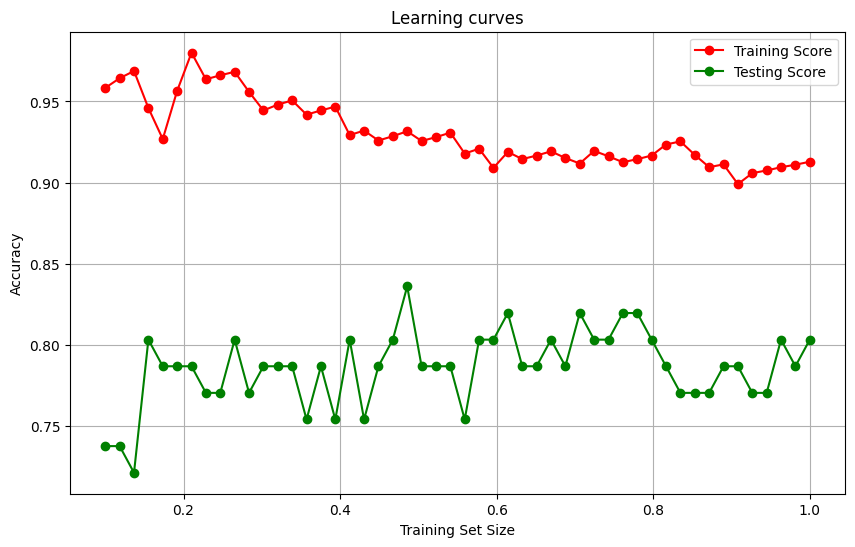

In [265]:
#@title Learning Curve
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_sizes = np.linspace(0.1, 1, 50)
learning_curve_train = []
learning_curve_test = []

clf = SVC(random_state=42)

for train_size in train_sizes:
    num_samples = int(train_size * len(X_train))
    X_subset = X_train[:num_samples]
    y_subset = y_train[:num_samples]

    clf.fit(X_subset, y_subset)

    y_pred_train = clf.predict(X_subset)
    acc_train = accuracy_score(y_subset, y_pred_train)
    learning_curve_train.append(acc_train)

    y_pred_test = clf.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred_test)
    learning_curve_test.append(acc_test)

plt.figure(figsize=(10, 6))
plt.title('Learning curves')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(train_sizes, learning_curve_train, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, learning_curve_test, 'o-', color="g", label="Testing Score")
plt.legend(loc="best")
plt.show()

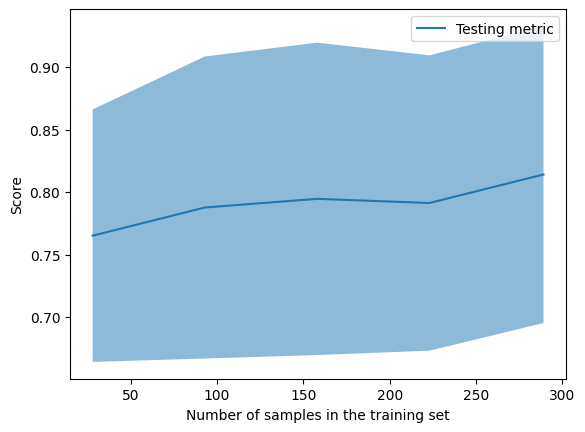

In [266]:
#@title Menampilkan learning curve dengan cross validation svm
import matplotlib.pyplot as plt
from sklearn.model_selection import LearningCurveDisplay, learning_curve
from sklearn.svm import SVC

svm = SVC(random_state=32)

X = df.drop(columns=['target'], axis=1)
y = df['target']


train_sizes, train_scores, test_scores = learning_curve(
    svm, X, y, cv=25)

display = LearningCurveDisplay(train_sizes=train_sizes,
                               train_scores=train_scores,
                               test_scores=test_scores,
                               score_name="Score")
display.plot()
plt.show()

### 7. Peserta dapat menjelaskan hasil dari visualisasi learning curves yang telah dihasilkan sebelumnya pada poin 6.

*   Overfitting yang Ringan: Kurva kinerja pada data latih menurun seiring dengan penambahan data, yang dapat menunjukkan bahwa model tidak lagi mampu dengan baik dalam mempelajari detail-detail kecil dari data latih. Namun, kinerja pada data latih masih lebih baik daripada kinerja pada data uji. Ini bisa menunjukkan bahwa model masih memiliki kapasitas untuk melakukan generalisasi dengan baik pada data baru, tetapi telah kehilangan kemampuan untuk dengan akurat mempelajari data latih.

*   Varian Tinggi: terdapat perbedaan yang signifikan antara kinerja pada data latih dan data uji, ini menunjukkan bahwa model mungkin memiliki varian yang tinggi, artinya sensitif terhadap fluktuasi dalam data latih. Ini bisa menjadi tanda bahwa model terlalu kompleks untuk dataset yang diberikan, yang dapat mengakibatkan overfitting atau performa yang buruk pada data baru.

*   Kurva Test Meningkat Tetapi Berada di Bawah Kurva Train: kurva kinerja pada data uji cenderung meningkat tetapi tetap berada di bawah kurva kinerja pada data latih, ini menunjukkan bahwa model mungkin masih dapat meningkatkan kinerjanya pada data uji dengan penambahan lebih banyak data atau penyesuaian parameter model.




### 8. Peserta mampu memperbaiki akurasi machine learning modul yang telah dibuat menggunakan hyperparameter tuning dan juga bootstrapping, jika ada.


In [267]:
#@title hyperparameter tunning svm
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC

X = df.drop(columns=['target'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}
svm = SVC()
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Parameter terbaik:", grid_search.best_params_)

y_pred = grid_search.predict(X_test)
accuracy = grid_search.best_estimator_.score(X_test, y_test)
print("Akurasi model terbaik:", accuracy)

Parameter terbaik: {'C': 100, 'gamma': 1, 'kernel': 'linear'}
Akurasi model terbaik: 0.7868852459016393


### 9. Peserta dapat mengukur model yang dibuat dengan metric evaluation yang sesuai dengan machine learning model yang telah dibuat sebelumnya dan yang terbaik untuk menyelesaikan masalah.

In [268]:
#@title cross validation
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC


X = df.drop(columns=['target'], axis=1)
y = df['target']


svm = SVC()
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(svm, X, y, cv=k_fold)


print("Cross-Validation Scores:", cv_scores)

print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.78688525 0.83606557 0.81666667 0.8        0.8       ]
Mean Accuracy: 0.8079234972677595


In [269]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, zero_one_loss
from sklearn.svm import SVC

X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC()
svm_model.fit(X_train, y_train)

predictions = svm_model.predict(X_test)

actual = y_test.tolist()

accuracy = accuracy_score(actual, predictions)
accuracy_percentage = accuracy * 100
print(f"Accuracy: {accuracy_percentage:.2f}%")

loss = zero_one_loss(actual, predictions)
print(f"Loss: {loss}")

Accuracy: 80.33%
Loss: 0.19672131147540983


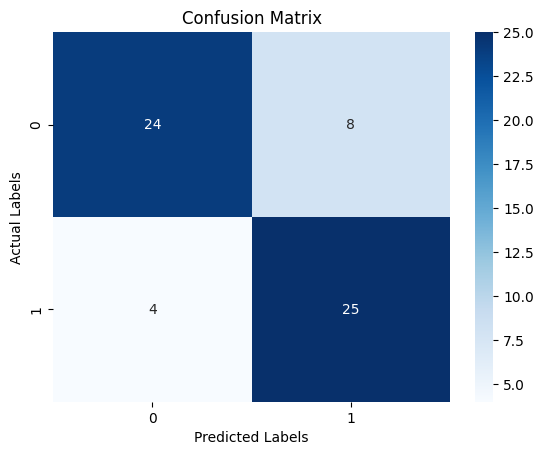

In [270]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC()
svm_model.fit(X_train, y_train)

predictions = svm_model.predict(X_test)

actual = y_test.tolist()

cm = confusion_matrix(actual, predictions)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 10})
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

### 10. Peserta dapat memberikan interpretasi dari hasil metric evaluation serta alasan pemilihan metric yang dipilih pada poin 9.

Interpretasi yang dapat saya simpulkan dari hasil metric evaluation diatas adalah sebagai berikut :
*   Cross Validation:Dari ketiga contoh penggunaan metric evaluation diatas saya dapat simpulkan cross validation adalah metode yang paling tepat, karna memiliki nilai prediksi yang paling tinggi. karna ini case untuk memprediksi sebuah penyakit maka tinggkat prediksi model yang tinggi sangat dibutuhkan

*   Ukuran Dataset: Dataset heart disease mungkin memiliki ukuran yang terbatas. Dengan menggunakan teknik cross validation, dapat memanfaatkan semua data yang ada untuk pembelajaran dan pengujian model, sehingga memberikan estimasi yang lebih andal tentang kinerja model.


*   Kemungkinan Overfitting: Dataset heart disease mungkin memiliki sejumlah kecil sampel, yang dapat meningkatkan risiko overfitting saat menggunakan teknik pemisahan sederhana seperti train-test split. Dengan menggunakan cross validation,  dapat mengurangi risiko overfitting dengan membagi data menjadi lipatan-lipatan yang berbeda dan menghitung kinerja model secara konsisten di seluruh lipatan.

*   Representasi yang Lebih Baik: Dengan menggunakan cross validation, dapat memastikan bahwa setiap sampel dalam dataset memiliki kesempatan untuk menjadi bagian dari set pelatihan dan set pengujian. Ini dapat menghasilkan representasi yang lebih baik dari variasi data dan memungkinkan evaluasi yang lebih akurat terhadap kinerja model.





